In [1]:
# Import necessary libraries for data processing, modeling, and visualization
# --- Random Forest_Pdr Categorical---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset and remove unnecessary column
df = pd.read_csv("dataset.csv")
df = df.drop(columns=['Unnamed: 0'])

# Define input features 
# Define input features (X) and target variable (y)
X = df.drop('pdr', axis=1)
y = df['pdr']

In [3]:
# Split data
# Split dataset into training and testing sets with 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model
# Initialize Random Forest Classifier with 100 trees and fixed random seed
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
# Train Random Forest Classifier model on training data
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
# Evaluate model performance using accuracy, confusion matrix, and classification report

acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, zero_division=1))

Accuracy: 0.9877
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      0.00      0.00         1
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         5
          19       0.67      1.00      0.80         2
          20       1.00      0.00      0.00         1
          24       1.00      0.00      0.00         1
          27       0.50      1.00      0.67         1
          29       0.00      1.00      0.00         0
          30       0.33      1.00      0.50         1
          31       0.50      0.20      0.29         5
          39       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         1
          49       1.00      0.50      0.67         2
          

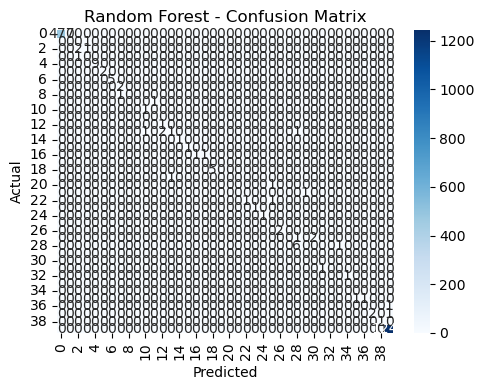

In [5]:
# Plot Confusion Matrix
# Plot and visualize confusion matrix heatmap

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

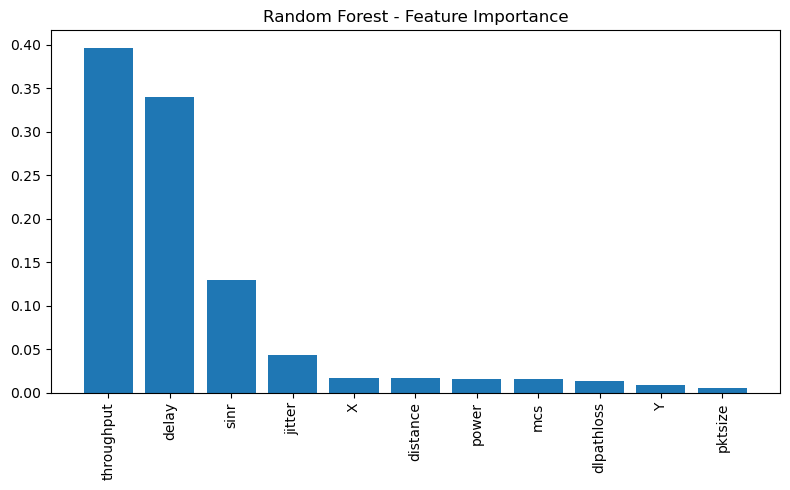

In [6]:
# Plot Feature Importance
# Calculate and plot feature importance rankings

importances = model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()